In [1]:
!pip install pythainlp
!pip install emoji
!pip install wordcloud

  Using cached pythainlp-2.3.2-py3-none-any.whl (11.0 MB)
  Using cached tinydb-4.7.0-py3-none-any.whl (24 kB)


You should consider upgrading via the 'C:\Users\jira\.conda\envs\env\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\jira\.conda\envs\env\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.3.4-cp36-cp36m-win_amd64.whl (8.5 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl (51 kB)


You should consider upgrading via the 'C:\Users\jira\.conda\envs\env\python.exe -m pip install --upgrade pip' command.


# UploadFile

In [2]:
#@title
from google.colab import files
import os

lsdi = os.listdir('/content')

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

if fn in lsdi:
    os.remove(fn)
    lsdi = os.listdir('/content') # list is in arbitrary order
    for k in sorted(lsdi,reverse=True): # sorted to get the most recent file name.
        fil_dados = re.match(fn[:fn.rfind('.')],k)
        if fil_dados:
            fn = k


ModuleNotFoundError: No module named 'google'

In [ ]:
#@title
import pandas as pd

data = pd.read_csv(fn)
comments = data['comments']
print(comments)

0      ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...
1      ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...
2      คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...
3      คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...
4          สอนแบบมี Logic และ วิธีการที่ชัดเจน ชอบมากค่ะ
                             ...                        
884    เหมาะสมกับทั้งคนที่ยังไม่มีพื้นฐาน และคนที่อยา...
885    อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...
886    อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...
887    สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...
888                                        ดีสุดๆเลยครับ
Name: comments, Length: 889, dtype: object


In [ ]:
#@title
import emoji
import re
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
thaistopwords = list(thai_stopwords())
not_stopwords = ['ก็ดี','แต่ก็','อย่างน้อย','เยอะ','ไม่ค่อย','แค่นี้','น้อยกว่า','ถูกต้อง','ผ่าน','แต่ต้อง','แต่ทว่า','พอเหมาะ','ถูกๆ','แค่นั้น','ผิด','เกิน','แต่ว่า','ควร','มาก','เพราะ','กว่า','เร็ว','เพราะว่า','พอเพียง','ถูก','เฉยๆ','มากมาย','สามารถ','ครบ','เยอะๆ','มากกว่า','น้อยๆ','สั้นๆ','เป็นเพราะ','อยาก','นอกจากนั้น','ช้า','ไม่ค่อยเป็น','สําหรับ','ง่ายๆ','เป็นเพราะว่า','แต่','นาน','ค่อนข้าง','มีแต่','ได้แต่','จริง','ค่อนข้างจะ','ยาก','เพียงแต่','แต่ละ','แค่','เพิ่ม','เนื่องจาก','ครบถ้วน','ไม่']
for i in not_stopwords:
    thaistopwords.remove(i)

def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def replace_eng(text):
    eng = re.compile('[a-zA-Z]')
    return eng.sub('',text)

def replace_punc(text):
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  res=" "
  for ele in text:
    if ele not in punc:
        res+=ele
  return res

def replace_num(text):
  return re.sub(r'[~^0-9]', '', text)

def process_text(text):
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_eng(res)
    res = replace_num(res)
    res = replace_punc(res)
    res = [word for word in word_tokenize(res) if word not in thaistopwords and not re.search(pattern=r"\s+" , string=word)]
    res = ungroup_emoji(res)
    return res

# Sentiment Analysis



In [ ]:
#@title
import pickle
pos_neg = pickle.load(open('DSI314_Colab/sgd_sentiment_analysis.pkl', 'rb'))

In [ ]:
#@title
d = {'comments': comments, 'sentiment': pos_neg.predict(comments)}
df = pd.DataFrame(d)
df['processed'] = df.comments.map(lambda x: '|'.join(process_text(x)))

## สัดส่วนคอมเมนต์ฝั่งบวกและลบ

pos    781
neg    108
Name: sentiment, dtype: int64


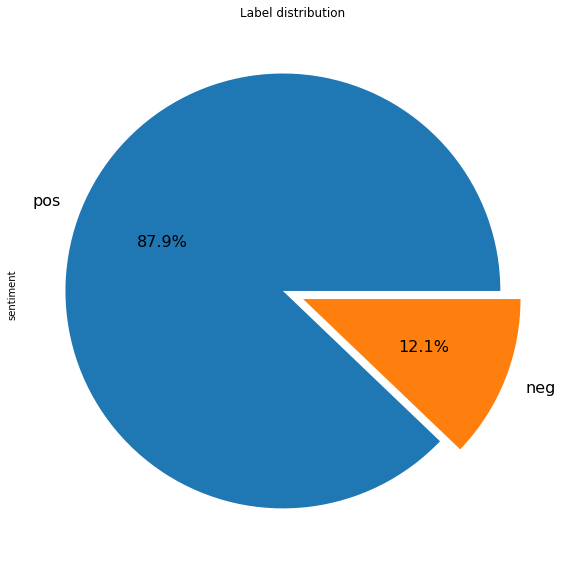

In [ ]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# Pie plot
df['sentiment'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Label distribution")
print(df['sentiment'].value_counts())

## World cloud ของคอมเมนต์ฝั่งบวก

In [ ]:
#@title
fp = 'DSI314_Colab/thsarabunnew-webfont.ttf'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


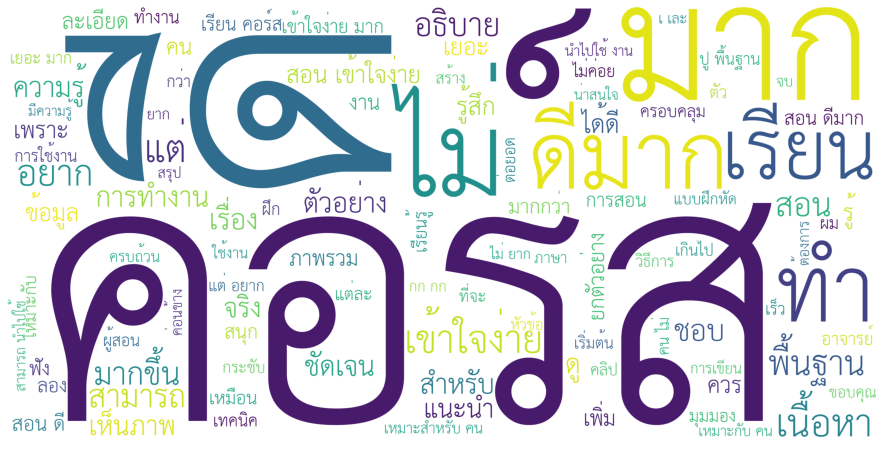

In [ ]:
#@title
from wordcloud import WordCloud

df_pos = df[df['sentiment'] == 'pos']['processed'].str.replace('|',' ')
pos_word_all = " ".join(text for text in df_pos)
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(background_color = 'white', max_words=100, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## World cloud ของคอมเมนต์ฝั่งลบ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


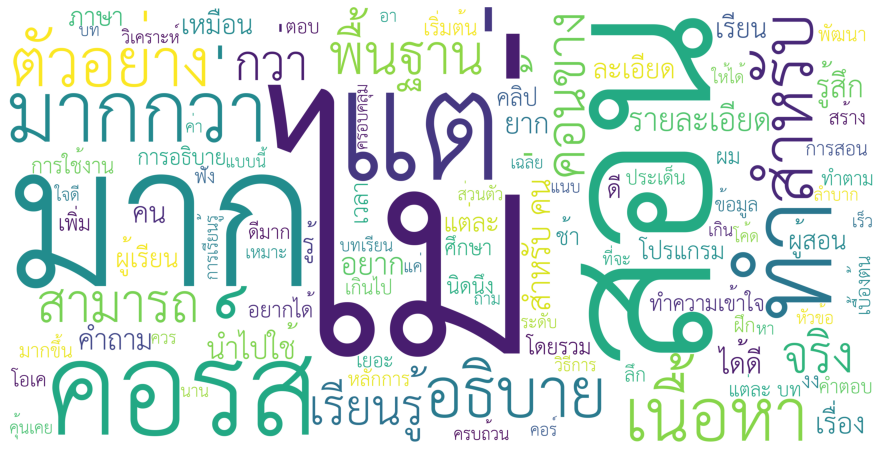

In [ ]:
#@title
df_neg = df[df['sentiment'] == 'neg']['processed'].str.replace('|',' ')
neg_word_all = " ".join(text for text in df_neg)
wordcloud = WordCloud(background_color = 'white', max_words=100, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## ดูคอมเมนต์แต่ละฝั่ง


In [ ]:
Sentiment =  '\uD83E\uDD70 pos' #@param ['🥰 pos', '☹️ neg']
Sentiment = ' '.join(Sentiment.split(' ')[1:])
for i in df['comments'].loc[df['sentiment']==Sentiment]:
    print('-',i)

- ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมีแต่เนื้อไม่มีน้ำ ตรงประเด็นมาก เลยรู้สึกว่าทุกคลิปที่ดู ได้ความรู้แบบไม่เสียเวลาดูไปเปล่าๆ แต่คิดว่าคอร์สนี้อาจจะต้องมีพื้นฐานทางด้านbusiness/marketingมาบ้างเพราะมีการใช้ศัพท์เฉพาะหลายๆอย่าง ส่วนตัวเคยเรียนมาเลยรู้เรื่อง คิดว่าดีที่ได้เอาไปต่อยอดเองได้ง่าย แต่ถ้าคนเริ่มจาก0เลยอาจจะเข้าใจยากบางจุดค่ะ แล้วก็อยากให้แจกไฟล์ที่สอนเป็นpdfด้วยเพราะไฟล์ที่แจกไม่ละเอียดเท่าอันที่สอนอะค่ะ
- ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด และการบริหารธุรกิจ ช่วยเติมเต็มและส่งเสริมเสริมองค์ความรู้เดิมและใหม่ให้ดียิ่งขึ้น เรีนยนง่าย ชอบตรงที่ไม่น้ำเยอะ สรุปๆ มาเลย เข้าใจง่าย เพราะเหลือคือการลงมือทำจริง
- คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั้นตอนการสอนที่ชัดเจน ดีมากครับ
- คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้าน GTM ได้ค่อนข้างชัดเจนครับ
- สอนแบบมี Logic และ วิธีการที่ชัดเจน ชอบมากค่ะ
- เห็นภาพรวมได้ดีครับ อยากให้มีเป็น bootcamp สำหรับด้านธุรกิจต่อไป
- อยากให้มีการอธิบายมากกว่านี้ เพราะสนุกดี
- ยังรู้สึกไม่ตรงตามความต้องการ เนื้อหาไม่ละ

In [ ]:
df

comments sentiment  \
0    ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...       pos   
1    ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...       pos   
2    คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...       pos   
3    คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...       pos   
4        สอนแบบมี Logic และ วิธีการที่ชัดเจน ชอบมากค่ะ       pos   
..                                                 ...       ...   
884  เหมาะสมกับทั้งคนที่ยังไม่มีพื้นฐาน และคนที่อยา...       pos   
885  อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...       pos   
886  อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...       neg   
887  สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...       pos   
888                                      ดีสุดๆเลยครับ       pos   

                                             processed  
0    ดี|วิทยากร|มีความรู้|ดีมาก|การสอน|แต่|เนื้อ|ไม...  
1    ชอบ|มาก|เหมาะสม|หรับ|ฐาน|เรื่อง|การตลาด|การบริ...  
2    คอร์ส|เนื้อหา|แน่น|ผู้สอน|สอน|ละเอียด|ขั้นตอน|...  
3         คอร์ส|หลักการ|กรอบ|ดำเนินงาน|ค่อนข้าง|ชัดเจน  
4                           สอน|วิธีการ|ชัดเจน|ชอบ|มาก  
..                                                 ...  
884   เหมาะสม|ไม่|พื้นฐาน|คน|อยาก|ทบทวน|ความรู้|ต่อยอด  
885  อันนี้|รีวิว|ดู|จบ|เกริน|ผม|ศึกษา|สมัครเรียน|ค...  
886  อบ|อย|สอน|ละเอียด|มาก|แต่|ทำได้|ยาก|รายละเอียด...  
887  สอน|ละเอียด|กระชับ|ชัดเจน|เนื้อหา|ครบถ้วน|แถม|...  
888                                                 ดี  

[889 rows x 3 columns]

#RankingของKeywords (1,2)

In [ ]:
#@title
from DSI314_Colab.visualize import top_feats_all, plot_top_feats
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), sublinear_tf=True)
tfidf_fit = tfidf.fit(df['comments'])
text_df = tfidf_fit.transform(df['comments'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
#@title
features = tfidf_fit.get_feature_names()
ts = top_feats_all(text_df.toarray(), df['sentiment'], features)
pos_rank = pd.DataFrame(ts[1]).set_index('rank')
neg_rank = pd.DataFrame(ts[0]).set_index('rank')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#@title
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=process_text, ngram_range=(1,2))
tc = []
for i in ['neg','pos']:
    transformed_data = tfidf.fit_transform(df['comments'].loc[df['sentiment']==i])
    count_df= pd.DataFrame(columns = ['feature', 'score','label'])
    count_df['feature'] = tfidf.get_feature_names()
    count_df['score'] = np.ravel(transformed_data.sum(axis=0))
    count_df['label'] = i
    count_df.sort_values(by='score', ascending=False, inplace = True)
    tc.append(count_df)

## แสดงผลลำดับ Keyword ของแต่ละฝัง

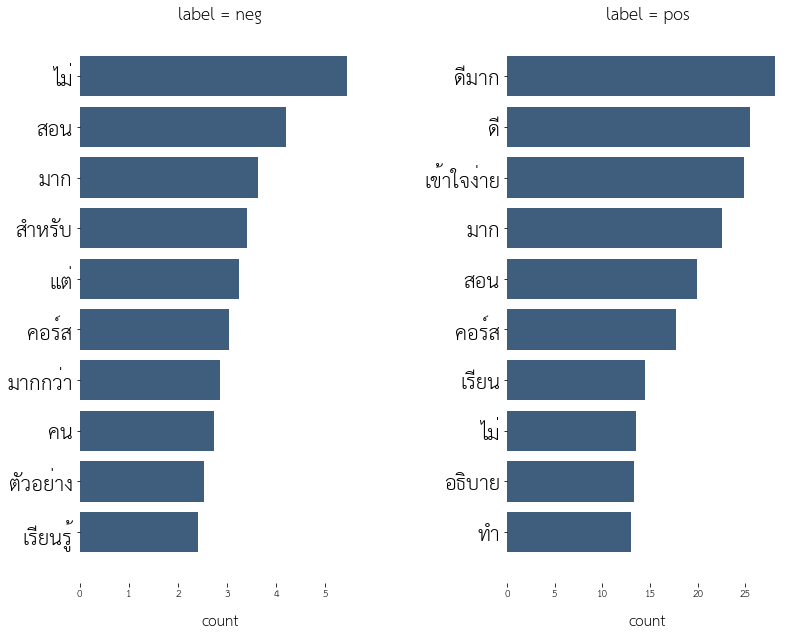

In [ ]:
#@title
import matplotlib
matplotlib.font_manager.fontManager.addfont(fp)
matplotlib.rc('font', family='TH Sarabun New')
fig = plt.figure(figsize=(12, 9), facecolor="w")
x = np.arange(10)
for i,a in enumerate(tc):
    a =a[:10].reset_index()
    ax = fig.add_subplot(1, len(ts), i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("count", labelpad=16, fontsize=14)
    ax.set_title(f"label = {str(a.label[0])}", fontsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.barh(x, a['score'], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, x[-1]+1])
    ax.invert_yaxis()
    yticks = ax.set_yticklabels(a.feature,  fontsize=20)
    plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
plt.show()

## ค้นหาคอมเมนต์ตามKeyword

In [ ]:
Sentiment =  '\uD83E\uDD70 pos' #@param ['🥰 pos', '☹️ neg']
Sentiment = ' '.join(Sentiment.split(' ')[1:])
Keyword =  '\u0E14\u0E35\u0E21\u0E32\u0E01' #@param {type:'string'}

print('Keyword:', Keyword)
for i in df['comments'][df['comments'].str.contains(Keyword)].loc[df['sentiment']==Sentiment]:
    print('-',i)

Keyword: ดีมาก
- ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมีแต่เนื้อไม่มีน้ำ ตรงประเด็นมาก เลยรู้สึกว่าทุกคลิปที่ดู ได้ความรู้แบบไม่เสียเวลาดูไปเปล่าๆ แต่คิดว่าคอร์สนี้อาจจะต้องมีพื้นฐานทางด้านbusiness/marketingมาบ้างเพราะมีการใช้ศัพท์เฉพาะหลายๆอย่าง ส่วนตัวเคยเรียนมาเลยรู้เรื่อง คิดว่าดีที่ได้เอาไปต่อยอดเองได้ง่าย แต่ถ้าคนเริ่มจาก0เลยอาจจะเข้าใจยากบางจุดค่ะ แล้วก็อยากให้แจกไฟล์ที่สอนเป็นpdfด้วยเพราะไฟล์ที่แจกไม่ละเอียดเท่าอันที่สอนอะค่ะ
- คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั้นตอนการสอนที่ชัดเจน ดีมากครับ
- ดีมากกก
- ดีมาก
- สอนได้ดีมากๆ เลยครับ เรียนรวดเดียว จบภายในวันเดียว แนะนำเลยครับ แต่ละคลิปไม่ยาวไม่สั้นเกินไป ดูรอบแรกให้เข้าใจทั้งหมดก่อน แล้วค่อยมานั่งเก็บรายละเอียดทีหลัง
- เนื้อหาเข้าใจง่ายมาก จากที่ไม่รู้เรื่อง LIFF เลยว่ามันทำงานอย่างไร ได้เรียนคอร์สนี้ซึ่งเป็นพื้นฐานที่ดีมาก ทำให้อยากเรียนคอร์สที่เกี่ยวกับ LIFF ต่อเลยครับ
- หัวข้อของบทเรียนดีมากครับ คาดว่าน่าจะได้นำไปใช้ในการทำงาน
- ให้กำลัังใจดีมากครับ กำลังจะท้อแล้วเชียวว
- ดีมากค่ะ
- อธิบายละเอียด และค่อยเป็น

#Clusteringข้อความ

In [ ]:
#@title
pos_clus = pickle.load(open('DSI314_Colab/pos_clustering.pkl', 'rb'))
neg_clus = pickle.load(open('DSI314_Colab/neg_clustering.pkl', 'rb'))

pos_df = df[df['sentiment']=='pos']
neg_df = df[df['sentiment']=='neg']
pos_df['Kmean Clus Label'] = pos_clus.predict(pos_df['comments'])
neg_df['Kmean Clus Label'] = neg_clus.predict(neg_df['comments'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#@title

def new_groups(label):
  if label == 5:
    return 1
  else:
    return label



pos_df['Label'] = pos_df['Kmean Clus Label'].apply(new_groups)
current_labels_pos = [0, 1, 2, 3, 4, 6]
desired_labels_pos = ['(ดี แต่อยาก)', '(ดี, ดีมาก)','(เข้าใจง่าย)','(ชมภาพรวมคอร์ส, ชัดเจนเห็นภาพ)', '(ทำให้, สามารถนำไปใช้จริง)','(ชอบมาก, ได้ความรู้เยอะ)']
map_dict_pos = dict(zip(current_labels_pos, desired_labels_pos))

pos_df['Label'] = pos_df['Label'].map(map_dict_pos)

current_labels_neg = [0, 1, 2]
desired_labels_neg = ['ไม่', 'คำติอื่นๆ', 'อยาก']
map_dict_neg = dict(zip(current_labels_neg, desired_labels_neg))

neg_df['Label'] = neg_df['Kmean Clus Label'].replace(map_dict_neg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## กลุ่มของคอมเมนต์ฝั่งบวก
*  (ดี แต่อยาก)
* (ดี, ดีมาก)
* (เข้าใจง่าย)
* (ชมภาพรวมคอร์ส, ชัดเจนเห็นภาพ)
* (ทำให้, สามารถนำไปใช้จริง, เหมาะสำหรับ)
* (ชอบมาก, ได้ความรู้เยอะ)







In [ ]:
#@title
tp = []
for i in desired_labels_pos:
    transformed_data = tfidf.fit_transform(pos_df['comments'].loc[pos_df['Label']==i])
    count_df= pd.DataFrame(columns = ['feature', 'score','label'])
    count_df['feature'] = tfidf.get_feature_names()
    count_df['score'] = np.ravel(transformed_data.sum(axis=0))
    count_df['label'] = i
    count_df.sort_values(by='score', ascending=False, inplace = True)
    tp.append(count_df)

### ลำดับ Keywords ของแต่ละกลุ่ม

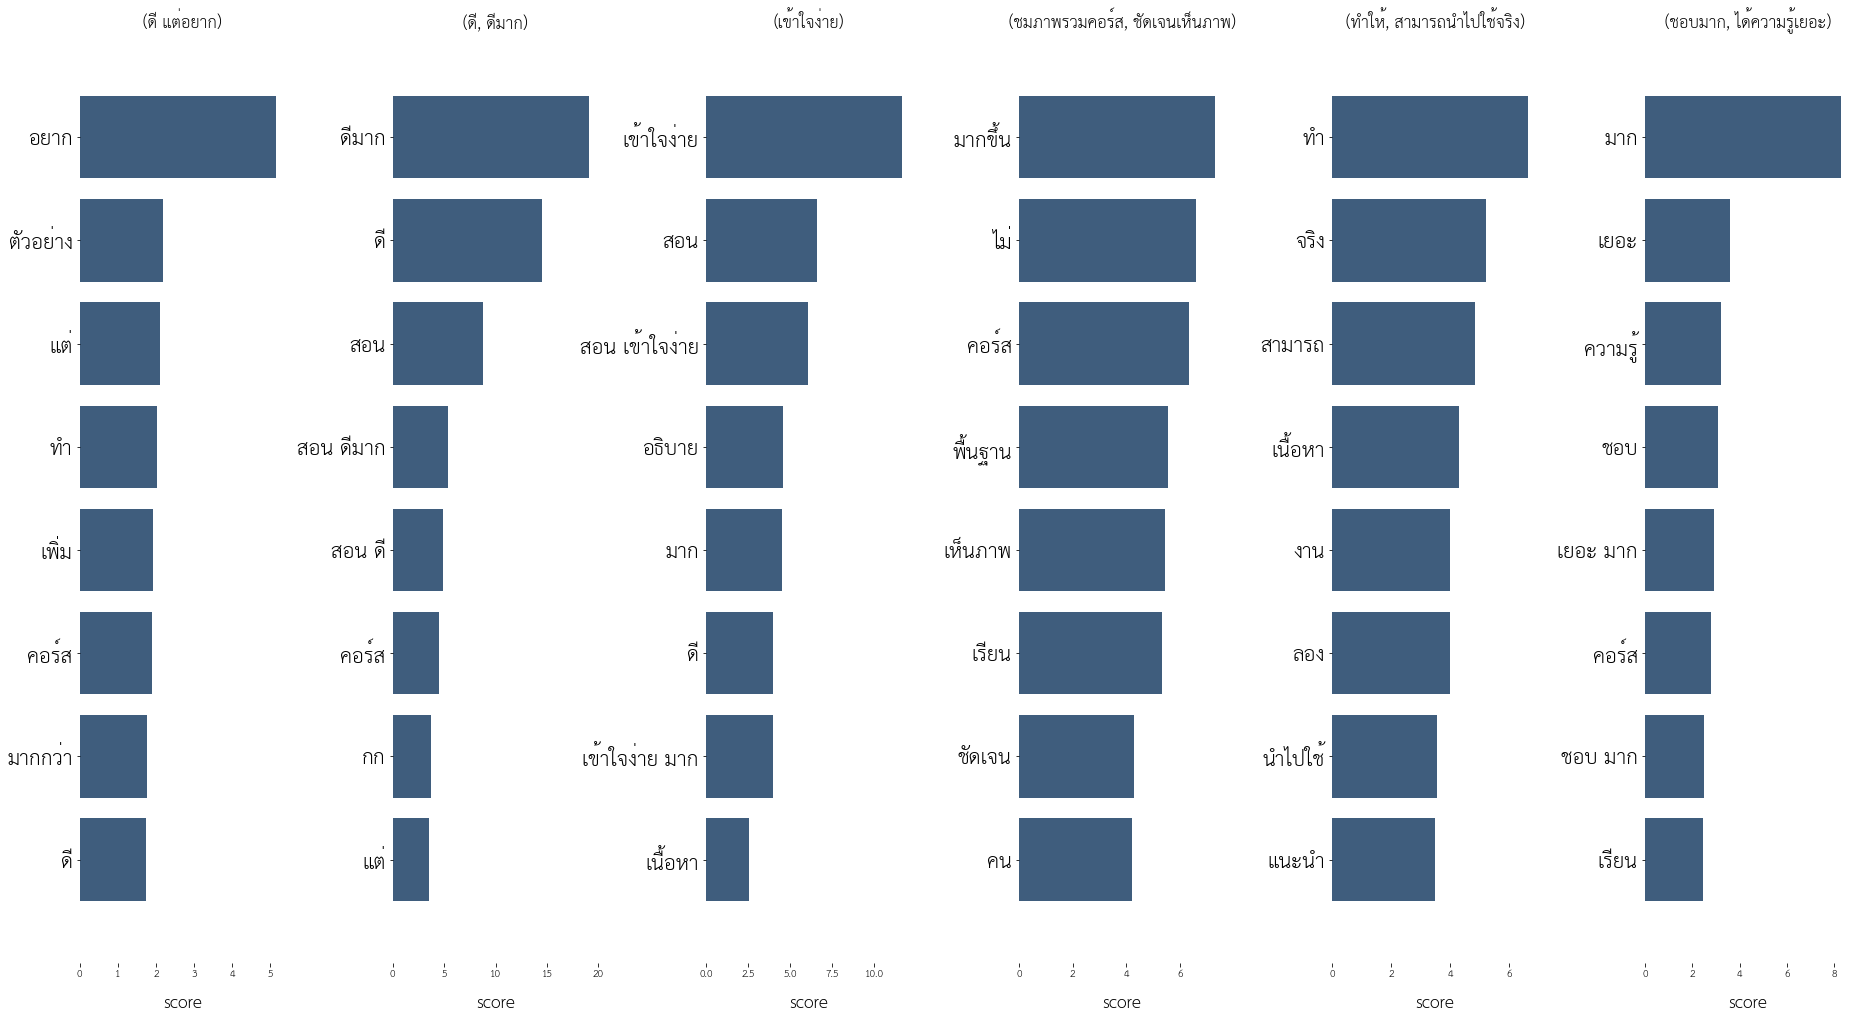

In [ ]:
#@title
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 15), facecolor="w")
x = np.arange(8)
for i,a in enumerate(tp):
    a =a[:8].reset_index()
    ax = fig.add_subplot(1, len(tp), i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel('score', labelpad=16, fontsize=16)
    ax.set_title(f"{str(a.label[0])}", fontsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.barh(x,a['score'], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, x[-1]+1])
    ax.invert_yaxis()
    yticks = ax.set_yticklabels(a.feature,  fontsize=20)
    plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
plt.show()

### จำนวน comments ของแต่ละกลุ่ม

(ทำให้, สามารถนำไปใช้จริง)        228
(ดี, ดีมาก)                       153
(ชมภาพรวมคอร์ส, ชัดเจนเห็นภาพ)    148
(เข้าใจง่าย)                      108
(ชอบมาก, ได้ความรู้เยอะ)           83
(ดี แต่อยาก)                       61
Name: Label, dtype: int64


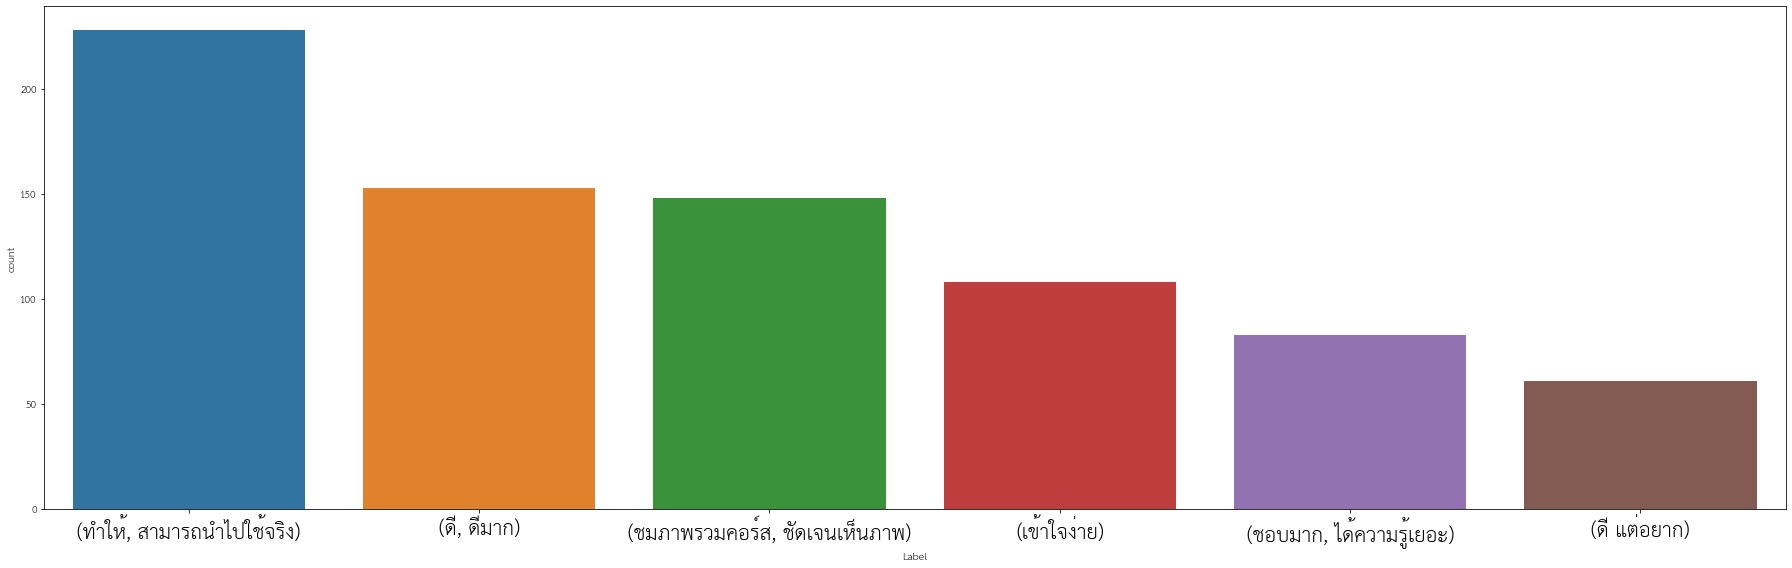

In [ ]:
#@title
plt.figure(figsize=(25,8))
ax = sns.countplot(x=pos_df['Label'],order = pos_df['Label'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
print(pos_df['Label'].value_counts())

plt.show()

### ดูข้อความของแต่ละกลุ่ม

In [ ]:
type_of_positivecomments = '(\u0E14\u0E35 \u0E41\u0E15\u0E48\u0E2D\u0E22\u0E32\u0E01)' #@param ['(ดี แต่อยาก)', '(ดี, ดีมาก)','(เข้าใจง่าย)','(ชมภาพรวมคอร์ส, ชัดเจนเห็นภาพ)', '(ทำให้, สามารถนำไปใช้จริง)','(ชอบมาก, ได้ความรู้เยอะ)']
for i in pos_df['comments'].loc[pos_df['Label']== type_of_positivecomments]:
    print('-',i)

- เห็นภาพรวมได้ดีครับ อยากให้มีเป็น bootcamp สำหรับด้านธุรกิจต่อไป
- อยากให้มีการอธิบายมากกว่านี้ เพราะสนุกดี
- ได้ภาพกว้างดีค่ะ แต่อยากทำ assignment เยอะหน่อย (ชอบมากเลยแบบที่มีให้ทำ) แล้วก็อยากได้การลงลึกมากกว่านี้อีกหน่อย
- อยากชวนเพื่อนมาฟังด้วยกัน
- มีหลายอย่างตรงกับงานที่กำลังจะใช้ แต่เนื้อหาค่อนข้างยาก อยากให้มีแนะนำคอร์สก่อนหน้า
- เป็นคอร์สที่เหมาะสำหรับผู้เริ่มต้นเรียนรู้และฝึกทักษะการเขียน SQL เนื้อหาโดยรวมรวบรัดและเหมาะสมดีครับ สนุกกับการลองเขียนโค้ด(แบบฝึกหัด) ในแต่ละบทเรียน ผิดบ้างถูกบ้าง แต่ก็ทำให้สนใจอยากเรียนรู้และฝึกเขียนต่อครับ
- อยากให้เห็น TABLE ก่อนที่จะมาทำ กรองก่อนเสมอจะได้รู้ว่า output จากสิ่งที่ทำต่างกันอย่างไร ซึ่งถ้าปกติมาให้ query ตมโจทย์เลยอาจจะไม่เห็นภาพมากนักเท่าไหร่
- ดีมากครับ  เหมาะสำหรับผู้เริ่มต้นสนใจ ทำ Data Visualization โดยใช้ Power BI  หรือคนที่อยากทบทวนความรู้พื้นฐาน  ให้ฐานแน่นขึ้น
- บางทีในส่วนของช่วงเเรกที่ให้ทำตาม อยากให้บอกจุดประสงค์ของการทำสิ่งๆ นั้นก่อนค่ะ ถ้ากดๆ ตามอย่างเดียวมันไม่รู้ว่าเอาไปทำเพื่ออะไร เเล้วมันต่อยอดลำบากค่ะ
- เหมาะสำหร

### ดู Wordcloud ของแต่ละกลุ่ม


(ชมภาพรวมคอร์ส, ชัดเจนเห็นภาพ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


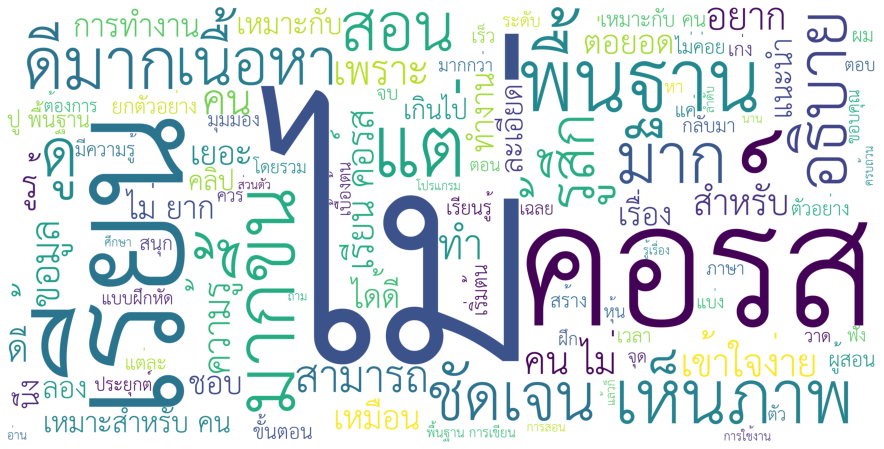

(ชอบมาก, ได้ความรู้เยอะ)


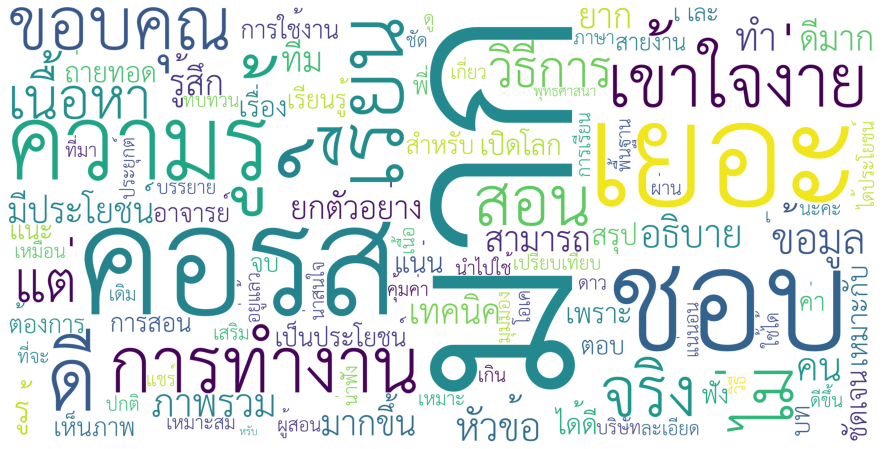

(ดี, ดีมาก)


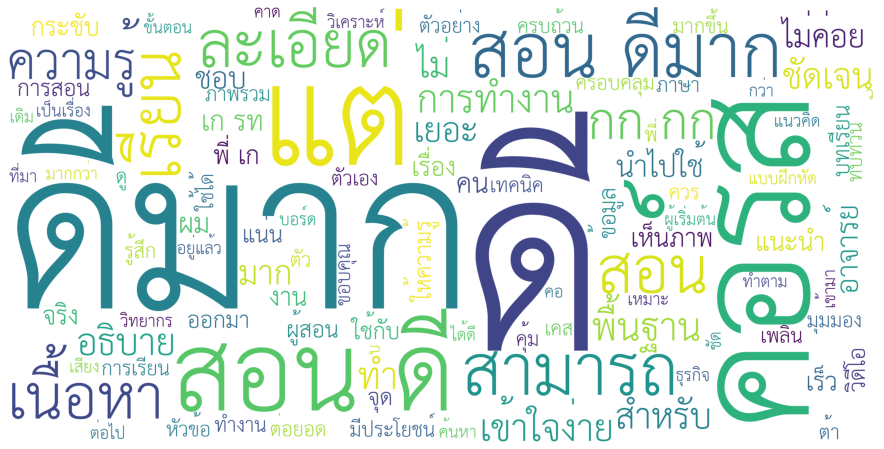

(ดี แต่อยาก)


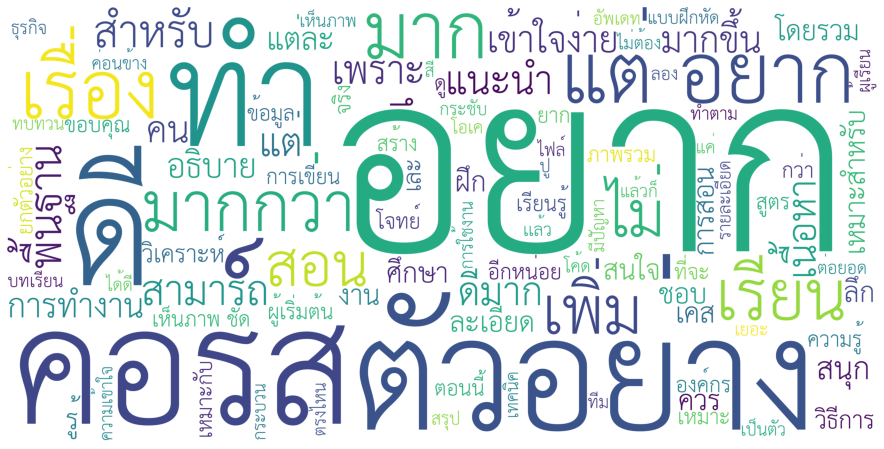

(ทำให้, สามารถนำไปใช้จริง)


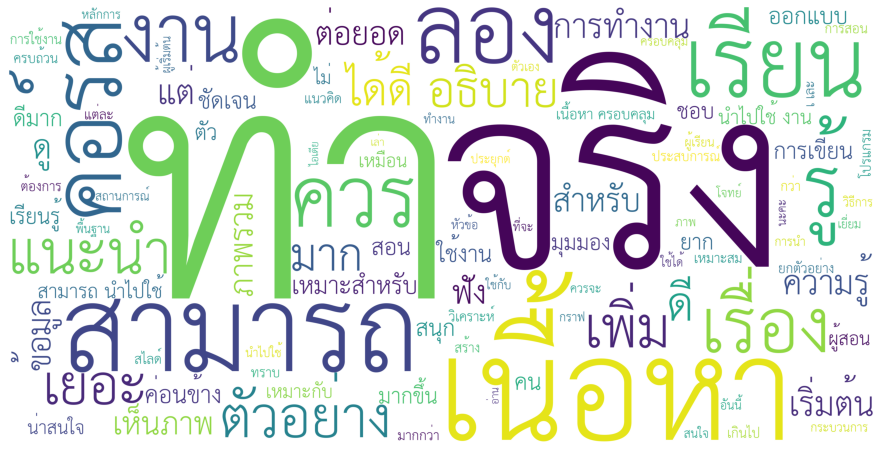

(เข้าใจง่าย)


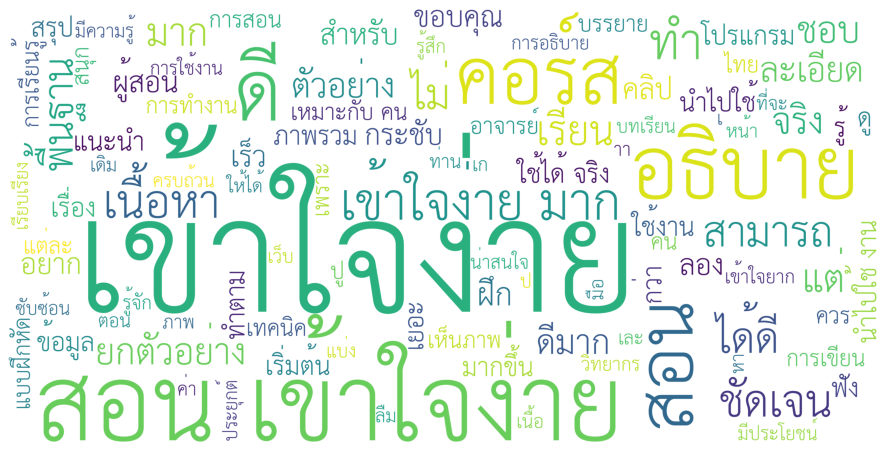

In [ ]:
#@title
label_pos = list(pos_df['Label'].unique())
for i in label_pos:
    print(i)
    data_pos = pos_df[pos_df['Label'] == i]
    word_all = " ".join(text for text in data_pos['processed'].str.replace('|',' '))
    reg = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(background_color = 'white', max_words=100, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
    plt.figure(figsize = (16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## กลุ่มของคอมเมนต์ฝั่งลบ
*   คำติอื่นๆ
*   ไม่
*   อยาก

In [ ]:
#@title
tn = []
for i in desired_labels_neg:
    transformed_data = tfidf.fit_transform(neg_df['comments'].loc[neg_df['Label']==i])
    count_df= pd.DataFrame(columns = ['feature', 'score','label'])
    count_df['feature'] = tfidf.get_feature_names()
    count_df['score'] = np.ravel(transformed_data.sum(axis=0))
    count_df['label'] = i
    count_df.sort_values(by='score', ascending=False, inplace = True)
    tn.append(count_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### ลำดับ Keywords ของแต่ละกลุ่ม

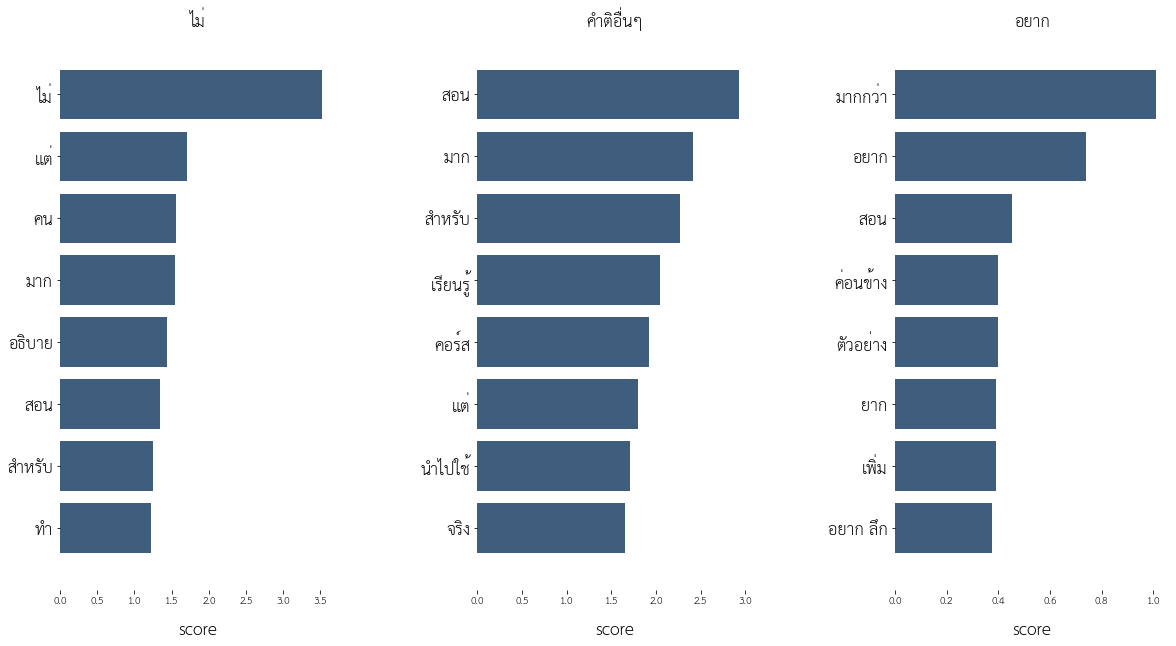

In [ ]:
#@title
fig = plt.figure(figsize=(40, 9), facecolor="w")
x = np.arange(8)
for i,a in enumerate(tn):
    a =a[:8].reset_index()
    ax = fig.add_subplot(1, len(tp), i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel('score', labelpad=16, fontsize=16)
    ax.set_title(f"{str(a.label[0])}", fontsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.barh(x,a['score'], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, x[-1]+1])
    ax.invert_yaxis()
    yticks = ax.set_yticklabels(a.feature,  fontsize=16)
    plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
plt.show()

### จำนวน comments ของแต่ละกลุ่ม

คำติอื่นๆ    51
ไม่          49
อยาก          8
Name: Label, dtype: int64


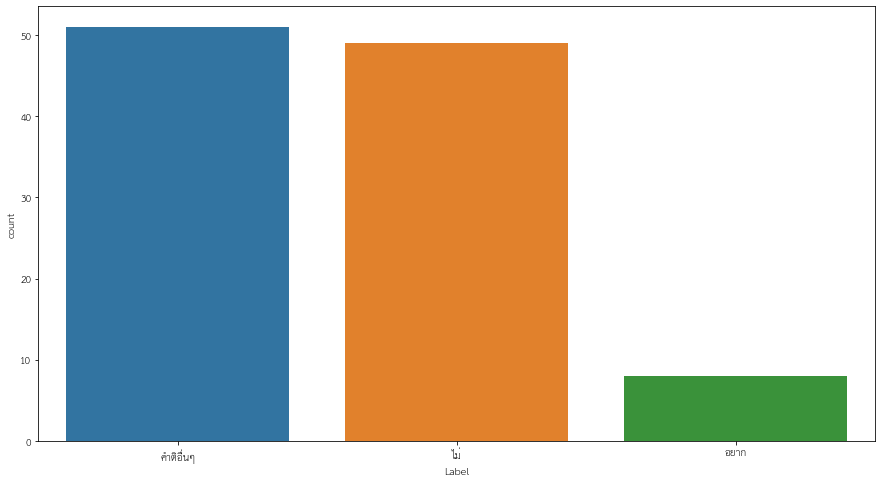

In [ ]:
#@title
plt.figure(figsize=(15,8))
sns.countplot(x=neg_df['Label'],order = neg_df['Label'].value_counts().index)
print(neg_df['Label'].value_counts())
plt.show()

### ดูข้อความของแต่ละกลุ่ม

In [ ]:
type_of_negativecomments = '\u0E44\u0E21\u0E48' #@param ['คำติอื่นๆ', 'ไม่', 'อยาก']
for i in neg_df['comments'].loc[neg_df['Label']== type_of_negativecomments ]:
    print('-',i)

- อาจารย์สอนเข้าใจดี ขาดเทคนิดในการสอนให้น่าติดตาม และการตัดต่อเยอะๆส่งผลให้ผู้ฟัง งง กับความต่อเนื่อง ทรงผมของผู้สอน ทำให้เกิดความไม่จริงหรือไม่น่าติดตามครับ
- เป็นคลิปสั้น เข้าใจง่ายๆ ในแต่ละบทเรียน ถ้าไม่เข้าใจ สามารถกดเรียนซ้ำได้โดนไม่ต้องกดหา
- ได้ความรู้เยอะขึ้นมาก
ข้อมูลละเอียดมาก สำหรับคนที่ไม่มีประสบการณ์ด้านสาขานี้มาก่อน
- มีการข้ามหัวข้อสร้าง Chat  Bot ไปทำให้คนที่สร้างไม่เป็นถึงขั้นงงเป็นไก่ตาแตกได้
- รู้สึกว่าคอร์สมันทั้งลึกไปและตื้นไป Quizบางอันที่ให้ทำcomplexมากเกินกว่าระดับคนไม่มีพื้นฐานมาก่อนและมีassumed knowledgeว่านักเรียนจะรู้แล้วหลายที่มากเกินไป ในหลายQuiz มันจะมีฟังก์ชันที่เราจะต้องใช้ทำคำตอบแต่ว่าก่อนหน้านั้นคอร์สไม่ได้มีการอธิบายอะไรเลยว่าแต่ละcommandมีไว้ใช้ทำอะไร ใช้ในสถานการณ์ไหน มีแค่บอกให้queryและลองดูผลลัพธ์กันเอง โดยรวมแล้วคอร์สโอเคเพื่อที่จะให้ทำกานคุ้นเคยกับSQLว่าเบสิคคอมมานด์มีอะไรบ้าง สามารถเอาไปใช้ทำอะไรได้บ้าง แต่ส่วนตัวรู้สึกว่าคอร์สยังไม่เตรียมให้นักเรียนสามารถเอาไปใช้ได้ในสถานการณ์จริงอย่างมั่นใจ
- ตอบคำถามช้า 3 วันแล้วยังไม่ได้คำตอบเลย
- เป็นคอร

### ดู Wordcloud ของแต่ละกลุ่ม
*คำเตือน ใช้เวลาในการรันนาน

อยาก


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


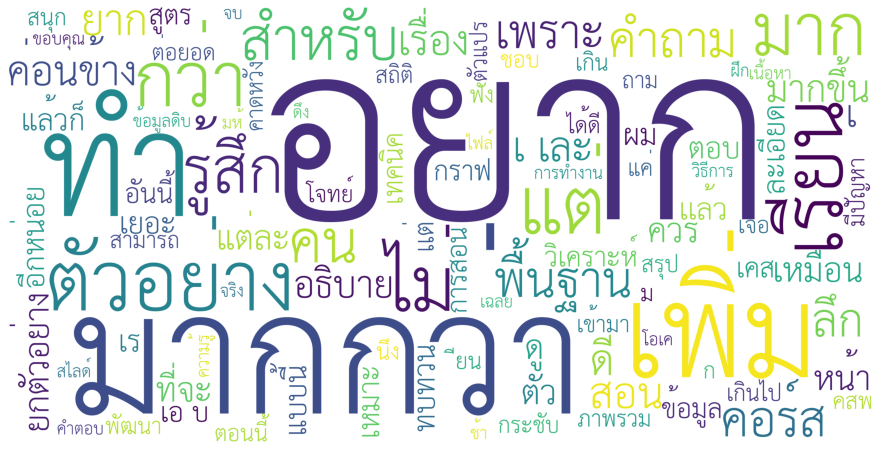

ไม่


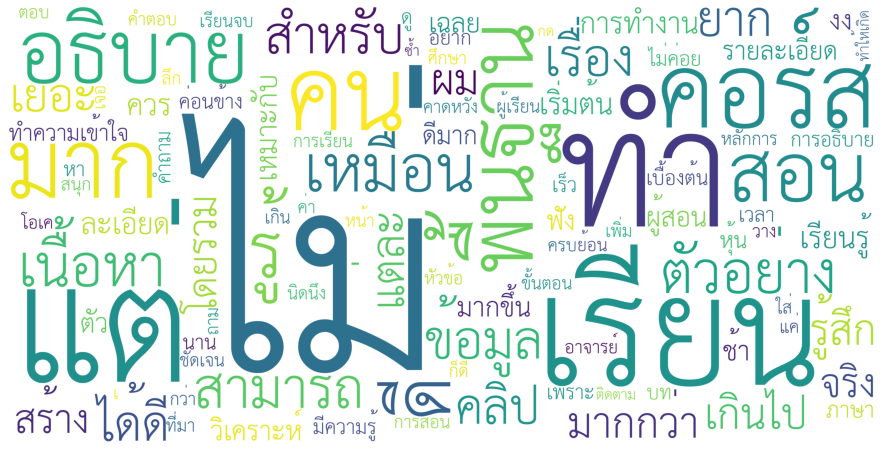

คำติอื่นๆ


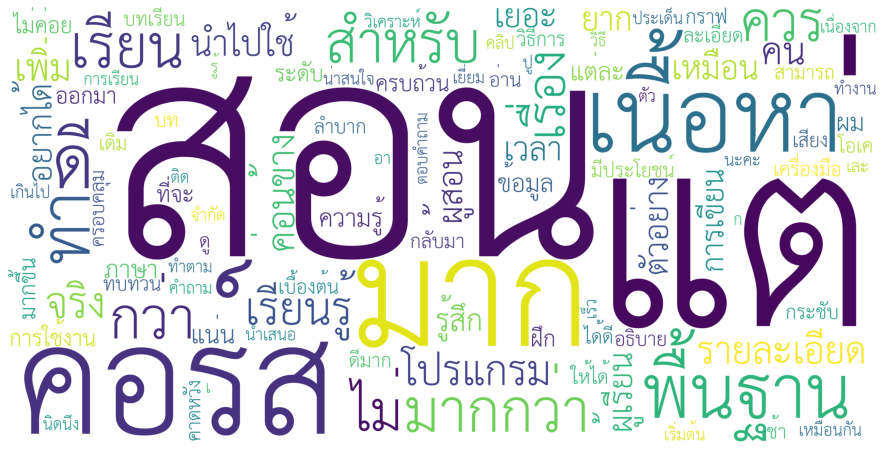

In [ ]:
#@title
label_neg = list(neg_df['Label'].unique())
for i in label_neg:
    print(i)
    data_neg = neg_df[neg_df['Label'] == i]
    word_all = " ".join(text for text in data_neg['processed'].str.replace('|',' '))
    reg = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(background_color = 'white', max_words=100, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
    plt.figure(figsize = (16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()